In [23]:
!unzip /content/Yolo__Data.zip

Archive:  /content/Yolo__Data.zip
   creating: Yolo__Data/
   creating: Yolo__Data/train/
  inflating: Yolo__Data/train/1_Renew_Licenced_Small_1_2022.png  
  inflating: Yolo__Data/train/1_Renew_Licenced_Small_1_2022.txt  
  inflating: Yolo__Data/train/1010_Expired_Notified_Building_1_2023.png  
  inflating: Yolo__Data/train/1010_Expired_Notified_Building_1_2023.txt  
  inflating: Yolo__Data/train/1011_Expired_Notified_Building_1_2016.png  
  inflating: Yolo__Data/train/1011_Expired_Notified_Building_1_2016.txt  
  inflating: Yolo__Data/train/1032_Expired_Notified_Building_1_2018.png  
  inflating: Yolo__Data/train/1032_Expired_Notified_Building_1_2018.txt  
  inflating: Yolo__Data/train/1033_Expired_Notified_Building_1_2020.png  
  inflating: Yolo__Data/train/1033_Expired_Notified_Building_1_2020.txt  
  inflating: Yolo__Data/train/1039_Expired_Notified_Building_1_2014.png  
  inflating: Yolo__Data/train/1039_Expired_Notified_Building_1_2014.txt  
  inflating: Yolo__Data/train/106_Rene

In [4]:
# !pip install ultralytics --quiet

### **YOLOv8 Training and Validation Pipeline for Tiny Object Detection**

#### **Overview**

This script trains and validates a YOLOv8 object detection model to detect tiny objects (buildings). It includes:

- Visualization of processed images (resized/padded images with bounding boxes).

- Training of the YOLOv8 model with custom parameters.

- Validation of the trained model to evaluate performance using mean Average Precision (mAP).

### **Step 1:** Import Required Libraries

In [3]:
from PIL import Image  # Image processing
import os  # File and directory operations
from ultralytics import YOLO  # YOLOv8 model handling
import cv2  # OpenCV for image manipulation
import numpy as np  # Numerical operations
import random  # Random sampling
import matplotlib.pyplot as plt  # Visualization
import torch  # PyTorch for deep learning
from google.colab.patches import cv2_imshow  # Display images in Google Colab

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### **Step 2:** Image Visualization with Bounding Boxes

In [24]:
def visualize_processed_image(output_dir, subset, img_filename):
    """Visualizes a preprocessed image with bounding boxes."""
    # Construct image and label file paths
    image_path = os.path.join(output_dir, subset, img_filename)
    label_path = os.path.join(output_dir, subset, img_filename.rsplit('.', 1)[0] + ".txt")

    # Load image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        print(f"❌ Error: Could not read image at {image_path}")
        return

    # Convert image format to RGB (handling transparency if present)
    if image.shape[2] == 4:  # If PNG with alpha channel
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    height, width = image.shape[:2]

    # Check if label file exists
    if not os.path.exists(label_path):
        print(f"❌ Label file not found: {label_path}")
        return

    with open(label_path, "r") as f:
        lines = f.readlines()

    # Display image using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()
    plt.title(f"Processed Image: {img_filename}\nSize: {width}x{height}")
    plt.axis("off")

    # Draw bounding boxes on image
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        try:
            class_id, x_center_norm, y_center_norm, w_norm, h_norm = map(float, parts)
        except ValueError:
            continue

        # Convert normalized coordinates to pixel values
        x_center = x_center_norm * width
        y_center = y_center_norm * height
        w = w_norm * width
        h = h_norm * height

        xmin = int(x_center - w / 2)
        ymin = int(y_center - h / 2)
        xmax = int(x_center + w / 2)
        ymax = int(y_center + h / 2)

        # Draw rectangle
        rect = plt.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin,
            linewidth=2, edgecolor='lime', facecolor='none'
        )
        ax.add_patch(rect)

    plt.show()

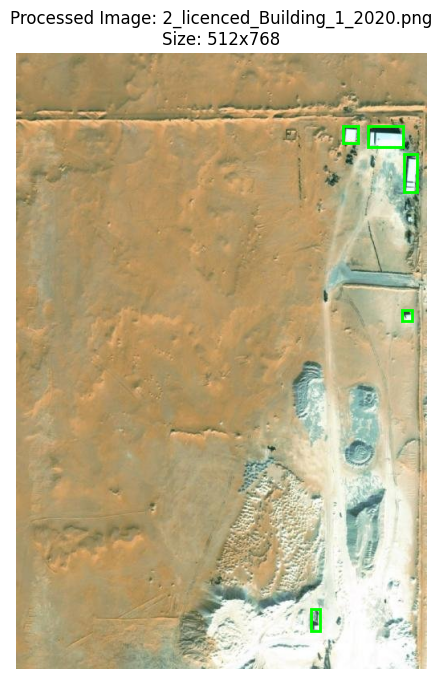

In [25]:
# Usage example:
visualize_processed_image(
    output_dir="/content/Yolo__Data",
    subset="train",
    img_filename="2_licenced_Building_1_2020.png"
)

### **Step 3:** Train YOLOv8 Model

In [26]:
# Configuration (Optimized for Colab)
TARGET_SIZE = 1280
data_yml = "/content/data.yaml"

In [33]:
def train_yolo():
    """Trains a YOLOv8 model with customized parameters."""
    torch.cuda.empty_cache()  # Clear GPU memory before training

    model = YOLO('yolov8m.pt')  # Load the YOLOv8 medium model

    results = model.train(
        data=data_yml,  # Path to dataset YAML file
        imgsz=TARGET_SIZE,  # Image size for training
        patience=15,  # Stop training if no improvement for 15 epochs
        epochs=100,  # Total training epochs
        batch=4,  # Batch size
        lr0=0.001,  # Initial learning rate
        weight_decay=0.0005,  # Regularization to prevent overfitting
        box=7.5,  # Box loss coefficient
        mosaic=1.0,  # Data augmentation (image mixing)
        mixup=0.0,  # Data augmentation (mixing images)
        degrees=10.0,  # Rotation augmentation
        shear=0.0,  # Shear augmentation
        perspective=0.0001,  # Perspective distortion augmentation
        copy_paste=0.0,  # Copy-paste augmentation
        overlap_mask=False,  # No overlap masking
        single_cls=True,  # Single-class training (buildings only)
        save=True,  # Save the best model
        project="runs/yolo_training",  # Directory to save training runs
        name="exp1"  # Experiment name
    )

### **Execute Training**

In [ ]:
train_yolo()  # Train the YOLOv8 model

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=100, time=None, patience=15, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/yolo_training, name=exp1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=False, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/Yolo__Data/train.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Yolo__Data/val.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]


Plotting labels to runs/yolo_training/exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/yolo_training/exp1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       9.2G      2.112      3.609      1.207         42       1280: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         24        393      0.298      0.258      0.176     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.42G      2.191      5.654      1.285         49       1280: 100%|██████████| 46/46 [00:27<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         24        393     0.0378      0.117     0.0123    0.00459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.97G      2.266      3.932      1.294         67       1280: 100%|██████████| 46/46 [00:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         24        393     0.0016     0.0254   0.000803   0.000341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.09G      2.283      3.222      1.263         67       1280: 100%|██████████| 46/46 [00:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         24        393     0.0404     0.0407    0.00456    0.00183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.07G      2.331       2.38      1.248         30       1280: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         24        393      0.204       0.12     0.0818     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.03G      2.198      2.145      1.238         73       1280: 100%|██████████| 46/46 [00:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         24        393      0.298      0.186      0.121     0.0455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.27G      2.349      2.085      1.307         36       1280: 100%|██████████| 46/46 [00:26<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         24        393      0.288      0.214      0.157     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.96G       2.24      2.218      1.272         91       1280: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         24        393       0.31      0.224      0.159     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.06G      2.242      1.988       1.26         39       1280: 100%|██████████| 46/46 [00:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         24        393       0.38      0.229      0.172      0.061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       7.3G      2.168      1.858      1.246         85       1280: 100%|██████████| 46/46 [00:29<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         24        393      0.315      0.181      0.132     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.85G      2.154      1.808      1.211         37       1280: 100%|██████████| 46/46 [00:26<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         24        393      0.328      0.211       0.14     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.87G      2.227      2.194      1.213         85       1280: 100%|██████████| 46/46 [00:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         24        393       0.28      0.239      0.169     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.14G      2.069      1.729      1.159         45       1280: 100%|██████████| 46/46 [00:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         24        393      0.322      0.239      0.168      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.86G      2.014      1.677      1.213        190       1280: 100%|██████████| 46/46 [00:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         24        393      0.308      0.223      0.168     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.01G      2.035      1.669      1.161        112       1280: 100%|██████████| 46/46 [00:27<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         24        393      0.402      0.269      0.221     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.19G       2.02      1.587      1.186         68       1280: 100%|██████████| 46/46 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         24        393      0.388      0.244      0.204     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.91G       1.99      1.627      1.184         49       1280: 100%|██████████| 46/46 [00:31<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         24        393      0.349      0.265      0.204      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.95G      1.934      1.602       1.18        125       1280: 100%|██████████| 46/46 [00:27<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         24        393      0.366      0.244      0.192     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.36G      1.967      1.697      1.171         48       1280: 100%|██████████| 46/46 [00:27<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         24        393      0.306      0.249      0.172     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       8.1G      1.918      1.611      1.134         52       1280: 100%|██████████| 46/46 [00:27<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         24        393      0.382      0.274      0.205     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.36G      2.003      1.604      1.171        107       1280: 100%|██████████| 46/46 [00:29<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         24        393      0.424      0.229       0.21      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.11G      1.953      1.548      1.179         95       1280: 100%|██████████| 46/46 [00:27<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         24        393      0.282      0.232       0.18     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.38G      1.934      1.553      1.167         72       1280: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         24        393      0.387      0.219      0.209     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.92G       1.91       1.55      1.154         74       1280:  83%|████████▎ | 38/46 [00:21<00:04,  1.79it/s]

### **Step 4:** Validate YOLOv8 Model

In [32]:
def validate_model():
    """Validates the trained YOLOv8 model using mAP metrics."""
    best_model = YOLO(f'runs/yolo_training/exp1/weights/best.pt')  # Load best trained model

    metrics = best_model.val(
        data="/content/data.yaml",  # Path to validation dataset
        imgsz=TARGET_SIZE,  # Image size for validation
        batch=4,  # Batch size for validation
        conf=0.25,  # Confidence threshold (lowered for small objects)
        iou=0.45  # Intersection over Union (IoU) threshold
    )

    # Print mean Average Precision (mAP) results
    print(f"mAP50-95: {metrics.box.map}")
    print(f"mAP50: {metrics.box.map50}")

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

## **Execute Validation**

In [ ]:
validate_model()  # Evaluate the trained model

### **Conclusion:**

- This script effectively trains and validates a YOLOv8 model for tiny object detection (buildings). It includes data augmentation, bounding box visualization, and evaluation to ensure optimal performance. Adjust hyperparameters as needed to improve accuracy!
